<a href="https://www.kaggle.com/code/samithsachidanandan/anomaly-detection-for-time-series-data-in-python?scriptVersionId=299850243" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Installing the Libraries

In [1]:
! pip install adtk yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00


# Import Libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import yfinance as yf 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")  
plt.style.use("seaborn-v0_8-whitegrid")

import warnings
warnings.filterwarnings('ignore')

from adtk.data import validate_series
from adtk.visualization import plot 
from adtk.detector import * 

In [3]:
df = pd.read_csv('/kaggle/input/datasets/ianpetrustan/global-temperature-time-series/monthly_csv.csv')

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index("Date")
df = df['Mean']

df = validate_series(df)

In [5]:
df.head()

Date
1880-01-06    0.0009
1880-02-06   -0.1229
1880-03-06   -0.1357
1880-04-06   -0.0499
1880-05-06   -0.0738
Name: Mean, dtype: float64

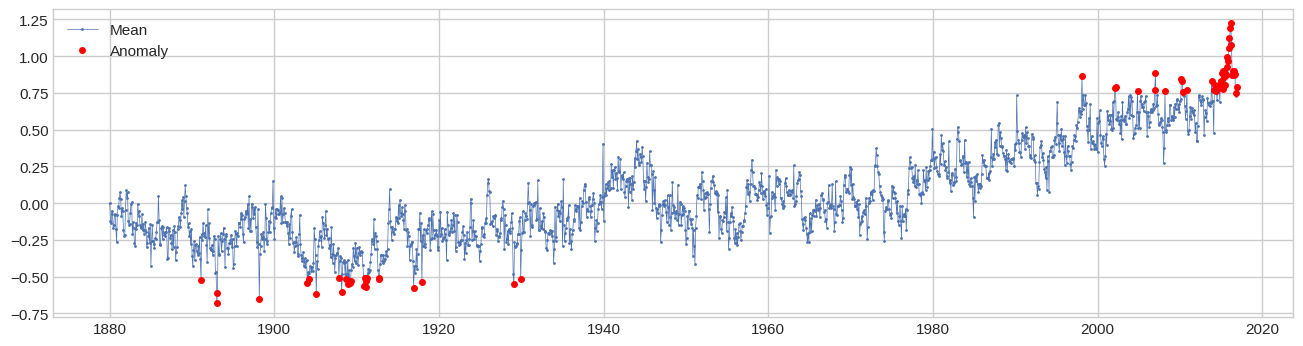

In [6]:
plt.style.library['seaborn-whitegrid'] = plt.style.library['seaborn-v0_8-whitegrid']

threshold_detector = ThresholdAD(low=-0.5, high=0.75)
anomalies = threshold_detector.detect(df)

plot(df, anomaly=anomalies, anomaly_color='red', anomaly_tag='marker')
plt.show()

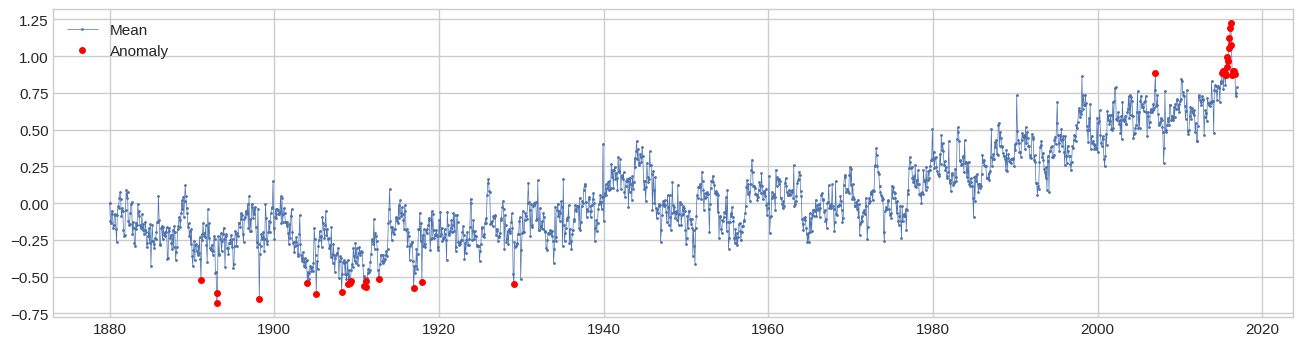

In [7]:

quantile_detector = QuantileAD(low=0.01, high=0.99)
anomalies = quantile_detector.fit_detect(df)

plot(df, anomaly=anomalies, anomaly_color='red', anomaly_tag='marker')
plt.show()

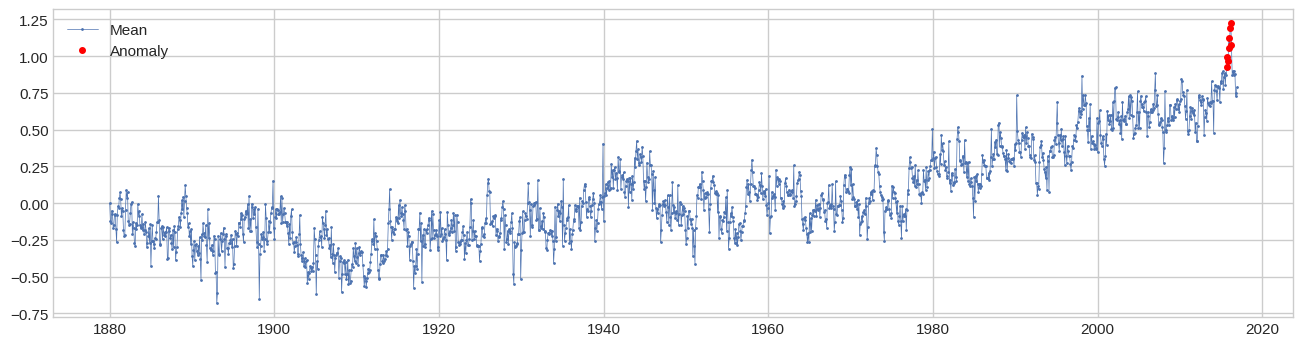

In [8]:
iqr_detector = InterQuartileRangeAD(c=1.5)
anomalies = iqr_detector.fit_detect(df)

plot(df, anomaly=anomalies, anomaly_color='red', anomaly_tag='marker')
plt.show()

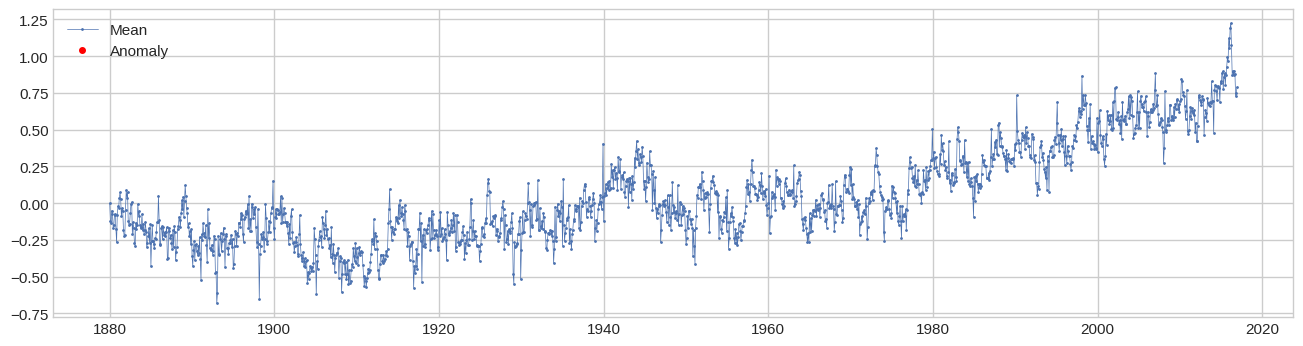

In [9]:
esd_ad = GeneralizedESDTestAD(alpha=0.3)
anomalies = esd_ad.fit_detect(df)

plot(df, anomaly=anomalies, anomaly_color='red', anomaly_tag='marker')
plt.show()

In [10]:
data = yf.download("TSLA", period="max")

[*********************100%***********************]  1 of 1 completed


In [11]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [12]:

data = validate_series(data)

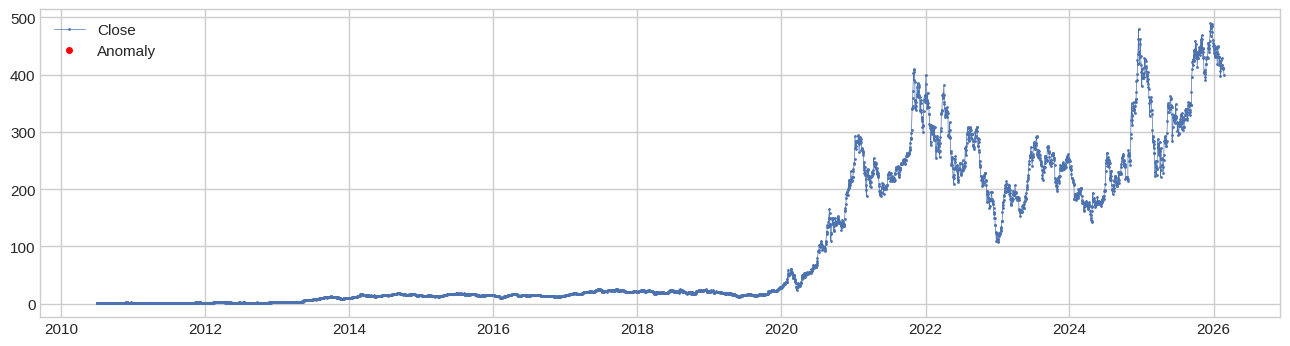

In [13]:
series = data[('Close', 'TSLA')].copy()
series.name = "Close"  

esd_ad = GeneralizedESDTestAD(alpha=0.3)
anomalies = esd_ad.fit_detect(series)

plot(series, anomaly=anomalies, anomaly_color='red', anomaly_tag='marker')
plt.show()

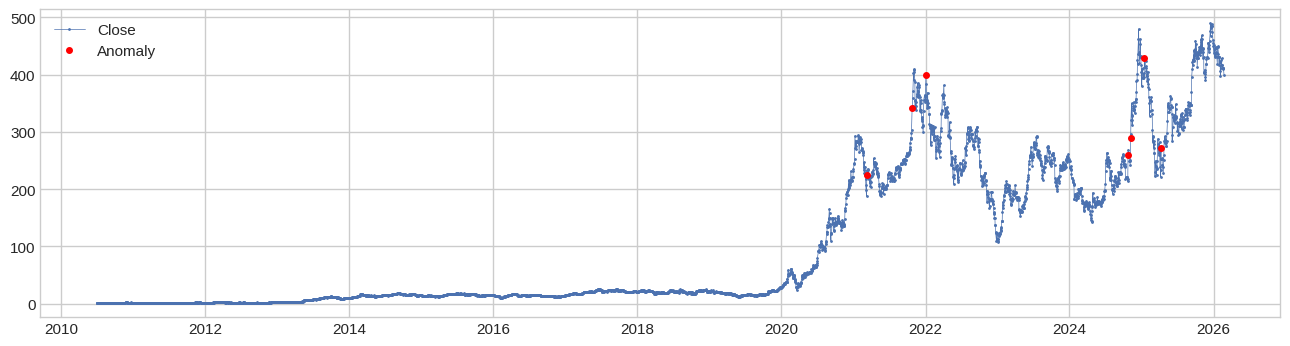

In [14]:
persist_detector =PersistAD(c=10.0, side="positive")

anomalies = persist_detector.fit_detect(series)

plot(series, anomaly=anomalies,anomaly_color='red', anomaly_tag='marker')
plt.show()

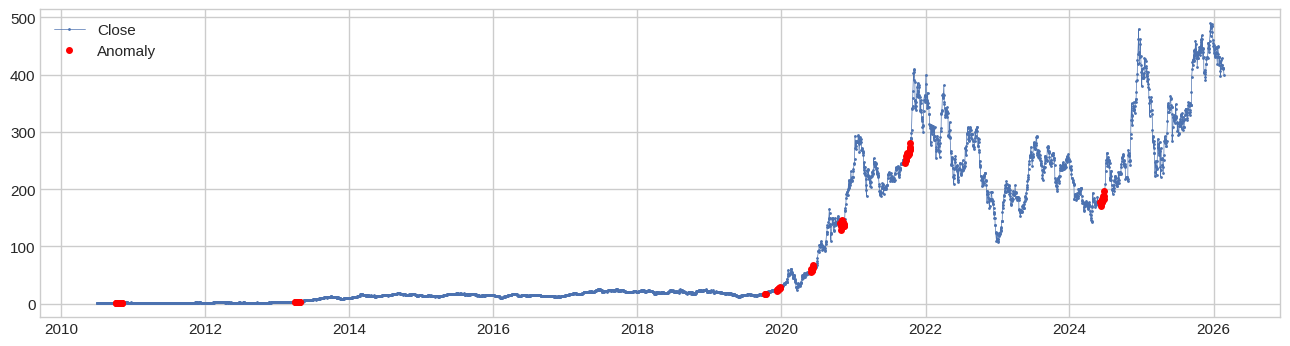

In [15]:
volatility_detector = VolatilityShiftAD(c=6.0, side="positive", window=30)

anomalies = volatility_detector.fit_detect(series)

plot(series, anomaly=anomalies,anomaly_color='red', anomaly_tag='marker')
plt.show()